In [1]:
import numpy as np
import pandas as pd
from spec_id import Median_w_Error_cont, Gauss_dist
import matplotlib.pyplot as plt
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [4]:
def Bootstrap_P(p_grid,x):
    Pbs = np.ones(x.size)
    bs_grid = np.zeros([1000,x.size])
    for i in range(1000):
        samp = np.zeros([len(p_grid),x.size])
        for ii in range(len(p_grid)):
            ID = np.random.choice(np.arange(len(p_grid)))
            samp[ii]=p_grid[ID]
    
        for ii in range(x.size):
            bs_grid[i][ii] = np.median(samp.T[ii])
        bs_grid[i] /= np.trapz(bs_grid[i],x)
    
    for i in range(x.size):
        Pbs[i] = np.mean(bs_grid.T[i])
    Pbs /= np.trapz(Pbs,x)
    return Pbs

def Bootstrap_P_med(p_grid,x):
    Pbs = np.ones(x.size)
    bs_grid = np.zeros([1000,x.size])
    for i in range(1000):
        samp = np.zeros([len(p_grid),x.size])
        for ii in range(len(p_grid)):
            ID = np.random.choice(np.arange(len(p_grid)))
            samp[ii]=p_grid[ID]
    
        for ii in range(x.size):
            bs_grid[i][ii] = np.median(samp.T[ii])
        bs_grid[i] /= np.trapz(bs_grid[i],x)
    
    for i in range(x.size):
        Pbs[i] = np.median(bs_grid.T[i])
    Pbs /= np.trapz(Pbs,x)
    return Pbs

In [107]:
"""DATA"""
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
mzDB = mzDB.query('ids != 14713 and ids != 38126')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')
gmtlDB = galDB.query('1.45 > hi_res_specz')
gmtlDB = gmtlDB.query('ids != 14713 and ids != 38126')

In [108]:
Pl_grid,Pm_grid,Ph_grid,Puh_grid = [[],[],[],[]]
Pl,Pm,Ph,Puh = np.ones([4,len(metal)])
for i in lzDB.index:
    x,Px = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % lzDB['gids'][i])
    Pl_grid.append(Px)
    Pl = Pl * Px
 
for i in mzDB.index:
    x,Px = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % mzDB['gids'][i])
    Pm_grid.append(Px)
    Pm = Pm * Px

for i in hzDB.index:
    x,Px = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % hzDB['gids'][i])
    Ph_grid.append(Px)
    Ph = Ph * Px

for i in uhzDB.index:
    x,Px = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % uhzDB['gids'][i])
    Puh_grid.append(Px)
    Puh = Puh * Px
    
Pl /= np.trapz(Pl,metal)
Pm /= np.trapz(Pm,metal)
Ph /= np.trapz(Ph,metal)
Puh /= np.trapz(Puh,metal)

Pl_grid = np.array(Pl_grid)
Pm_grid = np.array(Pm_grid)
Ph_grid = np.array(Ph_grid)
Puh_grid = np.array(Puh_grid)

Plmed,Pmmed,Phmed,Puhmed = np.zeros([4,metal.size])
Plmean,Pmmean,Phmean,Puhmean = np.zeros([4,metal.size])

for i in range(metal.size):
    Plmed[i] = np.median(Pl_grid.T[i])
    Pmmed[i] = np.median(Pm_grid.T[i])
    Phmed[i] = np.median(Ph_grid.T[i])
    Puhmed[i] = np.median(Puh_grid.T[i])
    Plmean[i] = np.mean(Pl_grid.T[i])
    Pmmean[i] = np.mean(Pm_grid.T[i])
    Phmean[i] = np.mean(Ph_grid.T[i])
    Puhmean[i] = np.mean(Puh_grid.T[i])
    
Plmed/= np.trapz(Plmed,metal)
Pmmed/= np.trapz(Pmmed,metal)
Phmed/= np.trapz(Phmed,metal)
Puhmed/= np.trapz(Puhmed,metal)
Plmean/= np.trapz(Plmean,metal)
Pmmean/= np.trapz(Pmmean,metal)
Phmean/= np.trapz(Phmean,metal)
Puhmean/= np.trapz(Puhmean,metal)
Plbs = Bootstrap_P(Pl_grid,metal)
Pmbs = Bootstrap_P(Pm_grid,metal)
Phbs = Bootstrap_P(Ph_grid,metal)
Puhbs = Bootstrap_P(Puh_grid,metal)

W = Leave_one_out(Pl_grid,metal)
top = np.zeros(Pl_grid.shape)
for i in range(W.size):
    top[i] = W[i] * Pl_grid[i]
Pladd =sum(top)/sum(W)
Pladd /= np.trapz(Pladd,metal)

W = Leave_one_out(Pm_grid,metal)
top = np.zeros(Pm_grid.shape)
for i in range(W.size):
    top[i] = W[i] * Pm_grid[i]
Pmadd =sum(top)/sum(W)
Pmadd /= np.trapz(Pmadd,metal)

W = Leave_one_out(Ph_grid,metal)
top = np.zeros(Ph_grid.shape)
for i in range(W.size):
    top[i] = W[i] * Ph_grid[i]
Phadd =sum(top)/sum(W)
Phadd /= np.trapz(Phadd,metal)

W = Leave_one_out(Puh_grid,metal)
top = np.zeros(Puh_grid.shape)
for i in range(W.size):
    top[i] = W[i] * Puh_grid[i]
Puhadd =sum(top)/sum(W)
Puhadd /= np.trapz(Puhadd,metal)

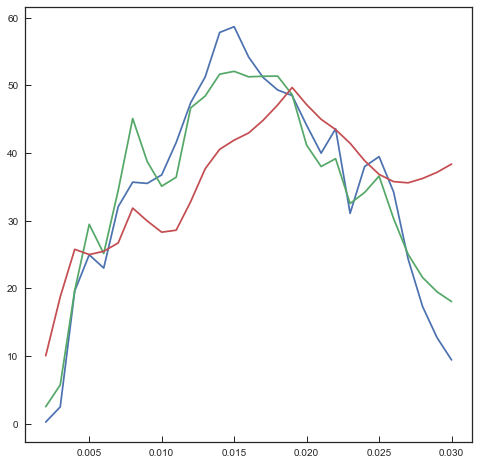

In [115]:
%matplotlib inline

# plt.figure(figsize=[8,8])
# plt.plot(metal,Pl)
# plt.plot(metal,Pm)
# plt.plot(metal,Ph)
# plt.plot(metal,Puh)
# plt.show()
# plt.close()
# 
# plt.figure(figsize=[8,8])
# plt.plot(metal,Plmed)
# plt.plot(metal,Pmmed)
# plt.plot(metal,Phmed)
# plt.plot(metal,Puhmed)
# plt.show()
# plt.close()
# 
# plt.figure(figsize=[8,8])
# plt.plot(metal,Plmean)
# plt.plot(metal,Pmmean)
# plt.plot(metal,Phmean)
# plt.plot(metal,Puhmean)
# plt.show()
# plt.close()
# 
# plt.figure(figsize=[8,8])
# plt.plot(metal,Plbs)
# plt.plot(metal,Pmbs)
# plt.plot(metal,Phbs)
# plt.plot(metal,Puhbs)
# plt.show()
# plt.close()
# 
# plt.figure(figsize=[8,8])
# plt.plot(metal,Pladd)
# plt.plot(metal,Pmadd)
# plt.plot(metal,Phadd)
# plt.plot(metal,Puhadd)
# plt.show()
# plt.close()

plt.figure(figsize=[8,8])
# plt.plot(metal,Pl)
plt.plot(metal,Pmmed)
# plt.plot(metal,Plmean)
plt.plot(metal,Pmbs)
plt.plot(metal,Pmadd)
plt.show()
plt.close()

In [195]:
print Median_w_Error_cont(Pm,metal)
print Median_w_Error_cont(Pmmed,metal)
print Median_w_Error_cont(Pmmean,metal)
print Median_w_Error_cont(Pmbs,metal)

(0.017206412825651302, 0.0026933867735470952, 0.0022444889779559135)
(0.016140280561122242, 0.0070140280561122228, 0.0076873747494989979)
(0.015523046092184366, 0.0084729458917835662, 0.010212424849699395)
(0.016757515030060118, 0.0070140280561122245, 0.0073507014028056129)


In [7]:
x=np.arange(0,6,0.01)
ers = np.arange(0,1,0.001)
gdist = Gauss_dist(x,3,.75)
sp_size = 12

In [7]:
plt.plot(x,gdist)

In [102]:
dist_grid= np.zeros([sp_size,x.size])
for i in range(sp_size):
    dist_grid[i] = Gauss_dist(x,np.random.normal(3,.75),np.random.choice(ers))

In [68]:
def Leave_one_out(dist,x):
    Y = np.zeros(x.size)
    for i in range(len(dist)):
        Y += dist[i]
    Y /= np.trapz(Y,x)
    
    w=np.arange(.01,2.01,.01)
    weights =np.zeros(len(dist))
    for i in range(len(dist)):
        Ybar = np.zeros(x.size)
        for ii in range(len(dist)):
            if i != ii:
                Ybar += dist[ii]
        Ybar /= np.trapz(Ybar,x)
        weights[i] = np.sum((Ybar - Y)**2)**-1
        # loo = np.zeros(w.size)
        # for ii in range(w.size):
        #     loo[ii]  = np.sum((Ybar*w[ii] - Y)**2)
        # print np.sum((Ybar - Y)**2)
        # print w[np.argmin(loo)]
        # plt.plot(w,loo)
        # plt.show()
        # plt.close()
        # weights[i] = w[np.argmin(loo)]
    return weights

In [69]:
W = Leave_one_out(dist_grid,x)

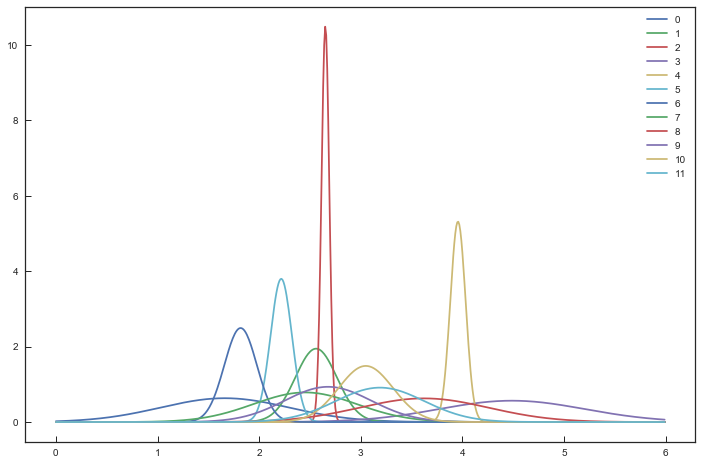

In [103]:
%matplotlib inline
plt.figure(figsize=[12,8])
for i in range(sp_size):
    plt.plot(x,dist_grid[i],label ='%s' % i)
plt.legend()
plt.show()
plt.close()

In [70]:
top = np.zeros(dist_grid.shape)
for i in range(W.size):
    top[i] = W[i] * dist_grid[i]
HPadd =sum(top)/sum(W)
HPadd /= np.trapz(HPadd,x)


In [104]:
W = Leave_one_out(dist_grid,x)
top = np.zeros(dist_grid.shape)
for i in range(W.size):
    top[i] = W[i] * dist_grid[i]
HPadd =sum(top)/sum(W)
HPadd /= np.trapz(HPadd,x)

HP = np.ones(x.size)
for i in range(sp_size):
    HP = HP * dist_grid[i]
HP /= np.trapz(HP,x)

HPmed = np.ones(x.size)
for i in range(x.size):
    HPmed[i] = np.median(dist_grid.T[i])
HPmed /= np.trapz(HPmed,x)


HPmean = np.ones(x.size)
for i in range(x.size):
    HPmean[i] = np.mean(dist_grid.T[i])
HPmean /= np.trapz(HPmean,x)

HPbs = np.ones(x.size)
HPbsm = np.ones(x.size)
bs_grid = np.zeros([1000,x.size])
for i in range(1000):
    samp = np.zeros([sp_size,x.size])

    for ii in range(sp_size):
        ID = np.random.choice(np.arange(sp_size))
        samp[ii]=dist_grid[ID]

    for ii in range(x.size):
        bs_grid[i][ii] = np.median(samp.T[ii])
    bs_grid[i] /= np.trapz(bs_grid[i],x)

for i in range(x.size):
    HPbs[i] = np.mean(bs_grid.T[i])
    HPbsm[i] = np.median(bs_grid.T[i])
HPbs /= np.trapz(HPbs,x)
HPbsm /= np.trapz(HPbsm,x)

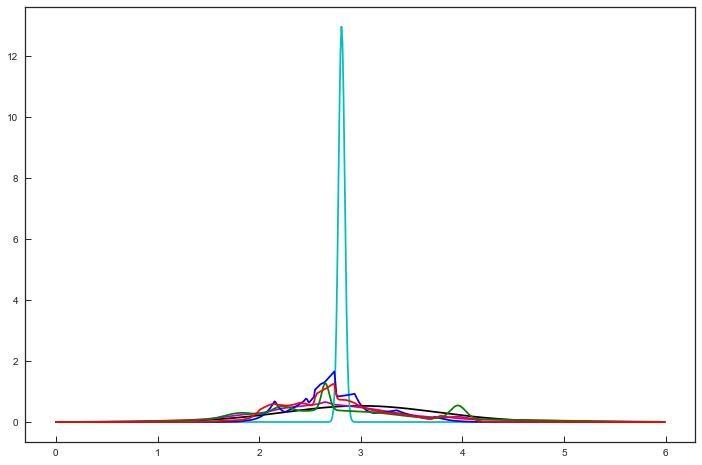

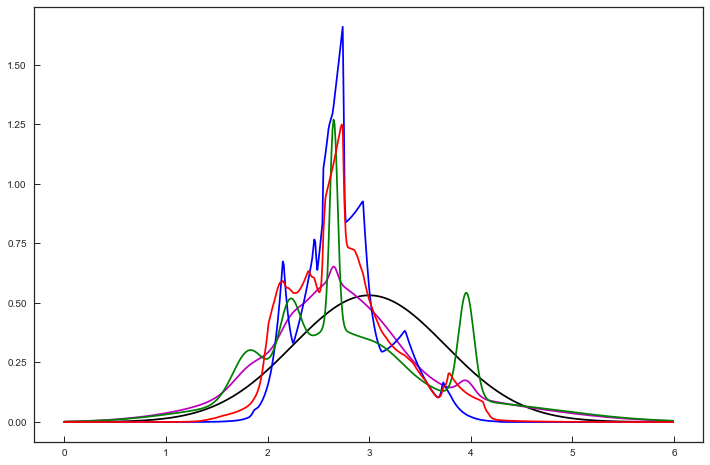

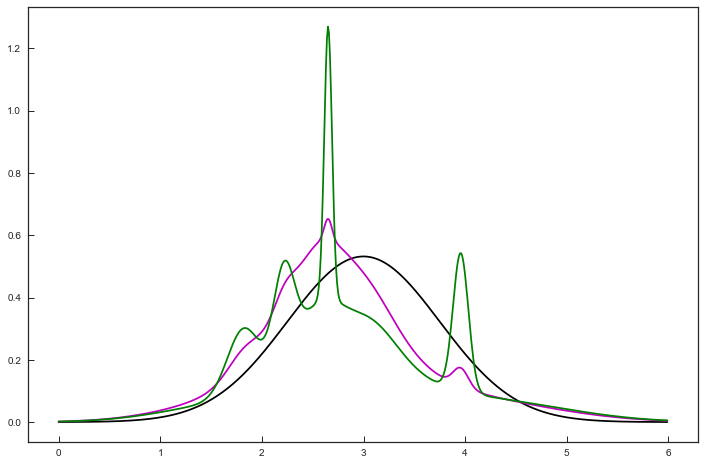

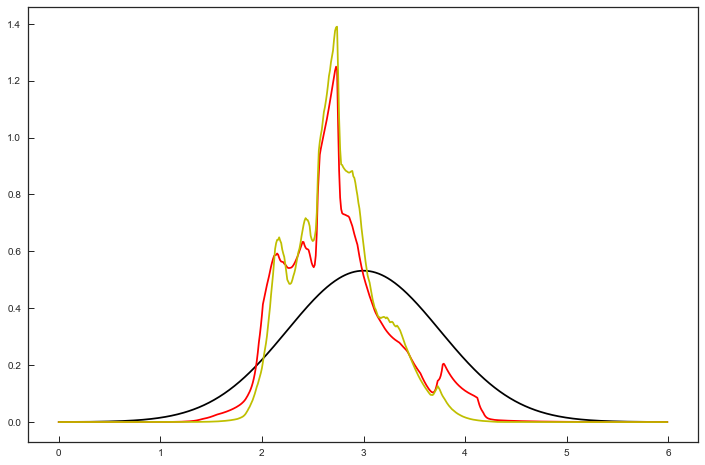

In [105]:
plt.figure(figsize=[12,8])
plt.plot(x,gdist,'k')
plt.plot(x,HPadd,'m')
plt.plot(x,HP,'c')
plt.plot(x,HPmed,'b')
plt.plot(x,HPmean,'g')
plt.plot(x,HPbs,'r')
plt.show()
plt.close()

plt.figure(figsize=[12,8])
plt.plot(x,gdist,'k')
plt.plot(x,HPadd,'m')
plt.plot(x,HPmed,'b')
plt.plot(x,HPmean,'g')
plt.plot(x,HPbs,'r')
plt.show()
plt.close()

plt.figure(figsize=[12,8])
plt.plot(x,gdist,'k')
plt.plot(x,HPadd,'m')
plt.plot(x,HPmean,'g')
plt.show()
plt.close()


plt.figure(figsize=[12,8])
plt.plot(x,gdist,'k')
plt.plot(x,HPbs,'r')
plt.plot(x,HPbsm,'y')
plt.show()
plt.close()

In [106]:
print Median_w_Error_cont(HP,x)
print Median_w_Error_cont(HPadd,x)
print Median_w_Error_cont(HPmed,x)
print Median_w_Error_cont(HPmean,x)
print Median_w_Error_cont(HPbs,x)
print Median_w_Error_cont(HPbsm,x)

(2.8209418837675351, 0.036012024048095892, 0.024008016032064372)
(2.7249098196392785, 0.67222444889779531, 0.84028056112224458)
(2.7129058116232465, 0.34811623246492962, 0.46815631262525059)
(2.7009018036072145, 0.67222444889779576, 1.2124048096192386)
(2.7009018036072145, 0.48016032064128256, 0.55218436873747478)
(2.7129058116232465, 0.40813627254508988, 0.43214428857715426)


In [213]:
its = 100

x=np.arange(0,6,0.01)
ers = np.arange(0.1,1,0.001)
gdist = Gauss_dist(x,3,.75)
sp_size = 12

mult_meth = np.zeros(its)
mult_meth_er = np.zeros(its)
med_meth = np.zeros(its)
med_meth_er = np.zeros(its)
mean_meth = np.zeros(its)
mean_meth_er = np.zeros(its)
bsmn_meth = np.zeros(its)
bsmn_meth_er = np.zeros(its)
bsmed_meth = np.zeros(its)
bsmed_meth_er = np.zeros(its)

for u in range(its):
    dist_grid= np.zeros([sp_size,x.size])
    for i in range(sp_size):
        dist_grid[i] = Gauss_dist(x,np.random.normal(3,0.75),np.random.choice(ers))
        
    HP = np.ones(x.size)
    for i in range(sp_size):
        HP = HP * dist_grid[i]
    HP /= np.trapz(HP,x)
    
    HPmed = np.ones(x.size)
    for i in range(x.size):
        HPmed[i] = np.median(dist_grid.T[i])
    HPmed /= np.trapz(HPmed,x)
    
    HPmean = np.ones(x.size)
    for i in range(x.size):
        HPmean[i] = np.mean(dist_grid.T[i])
    HPmean /= np.trapz(HPmean,x)
    
    HPbs = Bootstrap_P(dist_grid,x)
    HPbsm = Bootstrap_P_med(dist_grid,x)
    
    mult_meth[u],ler,her = Median_w_Error_cont(HP,x)
    mult_meth_er[u] = (ler+her)/2
    med_meth[u],ler,her = Median_w_Error_cont(HPmed,x)
    med_meth_er[u] = (ler+her)/2
    mean_meth[u],ler,her = Median_w_Error_cont(HPmean,x)
    mean_meth_er[u] = (ler+her)/2
    bsmn_meth[u],ler,her = Median_w_Error_cont(HPbs,x)
    bsmn_meth_er[u] = (ler+her)/2
    bsmed_meth[u],ler,her = Median_w_Error_cont(HPbsm,x)
    bsmed_meth_er[u] = (ler+her)/2

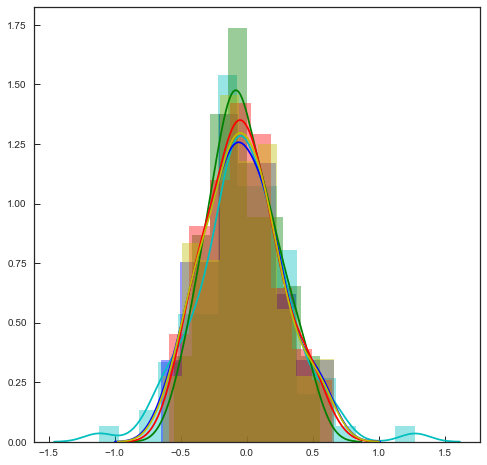

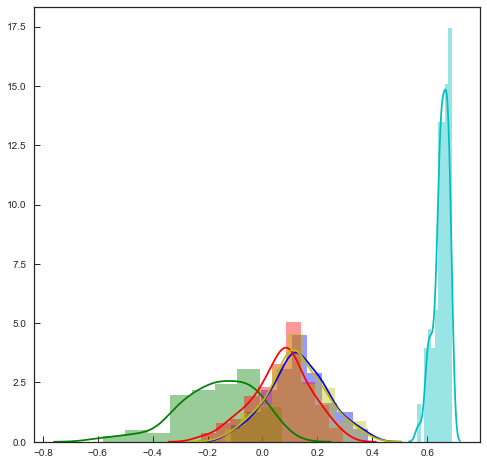

In [214]:
plt.figure(figsize=[8,8])
sea.distplot(3-mult_meth,color='c')
sea.distplot(3-med_meth,color='b')
sea.distplot(3-mean_meth,color='g')
sea.distplot(3-bsmn_meth,color='r')
sea.distplot(3-bsmed_meth,color='y')
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(0.75-mult_meth_er,color='c')
sea.distplot(0.75-med_meth_er,color='b')
sea.distplot(0.75-mean_meth_er,color='g')
sea.distplot(0.75-bsmn_meth_er,color='r')
sea.distplot(0.75-bsmed_meth_er,color='y')
plt.show()
plt.close()

In [202]:
mult_meth

array([ 0.02966333,  0.02971944,  0.02949499,  0.        ,  0.02971944])

In [4]:
print 3-np.mean(mult_meth)
print 3-np.mean(med_meth)
print 3-np.mean(mean_meth)
print 3-np.mean(bsmn_meth)
print 3-np.mean(bsmed_meth)

NameError: name 'mult_meth' is not defined